# Piggy Bank 
### By Divya Jain and Baiwen Zheng
Piggy Bank provide teens with highly accessible resources on investing, more specifically, the stock market. Our services include lectures and workshops taught by experts and college students who have experiences in the field and we are creating a community where young investors can collaborate and interact with each other.

This python notebook analyzes stocks under the S&P 500 index. With our initial step, we looked at the Earnings/Report ratio and analyzed the peaks and dips in the stock time-series. The information from this analysis is featured as an analysis functionality of our mobile application.

In [1]:
#to start, we needed to ensure that we had certain libraries installed on our python notebook
#we need to install yfinance in this case onto anaconda
!pip install yfinance

You should consider upgrading via the 'c:\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
#we've imported the libraries that we will be using here
import matplotlib.pyplot as plt #plotting tool
import csv #working with csvs
import yfinance as yf #finance stock library
import pandas as pd #generating data tables that can be transformed and plotted
from scipy.signal import find_peaks #attempt to find peaks using data science analysis of the plots

### Step 1: Understanding the yfinance library 
We first looked into the yfinance library to see what information we could parse and use when conducting our own analysis. For the purpose of this first crucial step, we focused on analyzing the apple stock (AAPL) before applying our analysis on other stocks in the S&P500 index.

In [3]:
def printInfo(stock):
    aapl = yf.Ticker(stock)
    gen_info = aapl.info
    price_to_earnings = gen_info['trailingPE']
    summary_array = gen_info['longBusinessSummary'].split('.')[0:4] #keep only first three sentences!
    summary = ""
    for sentence in summary_array:
        summary += sentence + ". "
    print("Price to earnings ratio: " + str(price_to_earnings))
    print("Summary: " + summary)
printInfo("AAPL")

Price to earnings ratio: 34.86007
Summary: Apple Inc.  designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide.  It also sells various related services.  The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, iPod touch, and other Apple-branded and third-party accessories. 


We looked at Apple's information, and decided that the most useful information from this given feature are the summary and the price to earnings ratio.
We also found an additional feature from this library to download open/close prices from the past five years to apply time-series analysis.

In [4]:
data = yf.download('AAPL','2015-01-01','2020-08-16') #downloads all basic data regarding the AAPL stock from the past five years
data.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,111.389999,111.440002,107.349998,109.330002,99.766006,53204600
2015-01-05,108.290001,108.650002,105.410004,106.250000,96.955429,64285500
2015-01-06,106.540001,107.430000,104.629997,106.260002,96.964584,65797100
2015-01-07,107.199997,108.199997,106.699997,107.750000,98.324242,40105900
2015-01-08,109.230003,112.150002,108.699997,111.889999,102.102089,59364500


As we can see from the above data, the yfinance library gives us access to multiple simple time-series data points that can be used to analyze AAPL's growth and risk over time. 

### Step 2: Analyzing time-series data
Our next step includes analyzing the peaks of the dataset for beginners that use the app to learn from. This will be helpful for beginners to see trends from past data, and learn for the future. For the purpose of this step, we focused again on Apple individually before going into all S&P 500 index stocks.

To analyze this time-series data, we looked at the price these stocks closed at as an indicator.

In [5]:
closing_prices = data['Close']
indices = find_peaks(closing_prices, threshold=5)[0]
closing_prices.head(5)

Date
2015-01-02    109.330002
2015-01-05    106.250000
2015-01-06    106.260002
2015-01-07    107.750000
2015-01-08    111.889999
Name: Close, dtype: float64

[ 987 1160 1298 1300 1304 1307 1309 1316 1368 1377 1400 1408 1410]


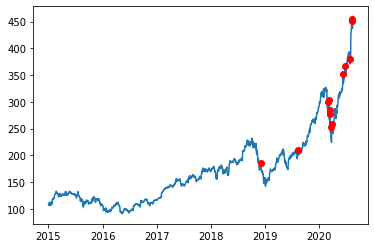

In [6]:
indices = find_peaks(closing_prices, threshold=6)[0]
print(indices)
plt.plot(data.index, data.Close)
for date in indices:
    plt.plot(data.iloc[[date]].index, data.iloc[[date]].Close, 'ro')

However, we can see from this graph that the current library doesn't offer good peak analysis. Because, we ran low on time, we hardcoded the peaks but are still looking for better ways to determine the peaks of a stock time-series graph. 

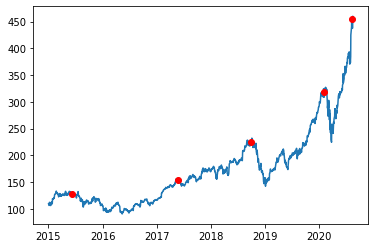

In [7]:
temp_indices = [107, 601, 941, 1280, 1408]
plt.plot(data.index, data.Close)
for date in temp_indices:
    plt.plot(data.iloc[[date]].index, data.iloc[[date]].Close, 'ro')

[*********************100%***********************]  1 of 1 completed


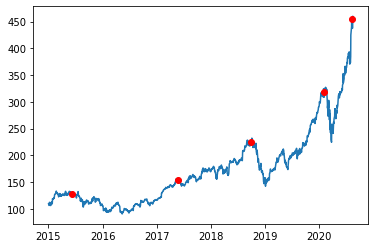

In [8]:
#compiled format for code from this step into one singular function
def graph(stock):
    data = yf.download(stock,'2015-01-01','2020-08-16')
    closing_prices = data['Close']
    plt.plot(data.index, data.Close)
    indices = [107, 601, 941, 1280, 1408]
    for date in indices:
        plt.plot(data.iloc[[date]].index, data.iloc[[date]].Close, 'ro')

graph("AAPL")

### Step 3: Calculating Risk of Investing based on Price-to-Earnings Ratio
From experience and research articles, we found that the PE ratio value is sometimes a good value of how risky an investment can be. Without the proper research, teens may blindly invest into stocks that can quickly crash due to the 'hype market'. For this hackathon, we mainly focused on one feature, but we know there are many different variables in calculating the risk.  

In [9]:
def risk(stock):   
    x = yf.Ticker(stock)
    gen_info = x.info
    price_to_earnings = gen_info['trailingPE']
    if price_to_earnings < 30:
        print("Low Risk Investment")
    if price_to_earnings >= 30 and price_to_earnings < 50:
        print("Medium Risk Investment")
    else:
        print("High Risk Investment")


### Step 4: Applying feature analysis to all stocks in S&P 500
We now read a CSV with all the stocks in this index and apply these algorithms to get the appropriate results. For the purpose of keeping this code simplified, we will only display the first five iterations of this algorithm running. However, all this data will be incorporated into our mobile application. 

MMM
could not find!
AOS
Price to earnings ratio: 27.310646
Summary: A.  O.  Smith Corporation manufactures and markets residential and commercial gas and electric water heaters, boilers, tanks, and water treatment products in North America, China, Europe, and India.  It operates through two segments, North America and Rest of World. 
Low Risk Investment
High Risk Investment
[*********************100%***********************]  1 of 1 completed
ABT
Price to earnings ratio: 57.764297
Summary: Abbott Laboratories discovers, develops, manufactures, and sells health care products worldwide.  Its Established Pharmaceutical Products segment offers generic pharmaceuticals for the treatment of pancreatic exocrine insufficiency; irritable bowel syndrome or biliary spasm; intrahepatic cholestasis or depressive symptom; gynecological disorder; hormone replacement therapy; dyslipidemia; hypertension; hypothyroidism; MÃ©niÃ¨re's disease and vestibular vertigo; pain, fever, and inflammation; migraine; 

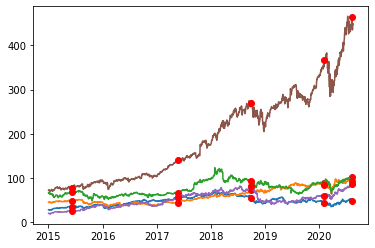

In [10]:
with open('Stocks.csv', newline='') as csvfile:
    look = csv.reader(csvfile, delimiter=' ', quotechar= '|')
    counter = 0
    for row in look:
        if counter == 5: # stop after five iterations of this functionality since 500 is too many!
            break 
        val = ','.join(row)
        print(val)
        try: 
            printInfo(val)
            risk(val)
            graph(val)
            counter = counter + 1
        except:
            print ("could not find!")